In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Economics_Posts.csv')
data

,ID,Title,Score,Selftext,URL,Subreddit,Created_On,Original,Comments,Flair
0,pkdqtj,"Job openings soar to record 10.9 million, outn...",5301,NaN,https://www.cnbc.com/2021/09/08/job-openings-s...,Economics,1.631118e+09,False,['Rule-breaking comments have reached an exces...,News
1,po24eo,China’s property market runs out of steam as m...,3576,NaN,https://www.yahoo.com/finance/news/china-prope...,Economics,1.631624e+09,False,"['[removed]', ""I'm not saying this is the same...",News
2,pfs6l5,Millions of Americans will lose unemployment b...,4865,NaN,https://www.cnbc.com/2021/08/31/millions-of-am...,Economics,1.630497e+09,False,"['Please keep all comments substantive, on top...",News
3,pp54vq,Lumber crash leads to 'blowout' sales as price...,2159,NaN,https://www.cbc.ca/news/business/lumber-prices...,Economics,1.631762e+09,False,"[""I'm in a totally different field but you can...",News
4,pkxj0n,"Skilled Workers Are Scarce, Posing a Challenge...",1288,NaN,https://nyti.ms/3jYqJgO,Economics,1.631193e+09,False,['It looks like this post may have political c...,News
...,...,...,...,...,...,...,...,...,...,...
3327,pllusx,Mumbai-Ahmedabad bullet train: Railways launch...,5,NaN,https://www.livemint.com/news/india/mumbaiahme...,india,1.631283e+09,False,[],Policy/Economy
3328,ohfpxb,Supercar owners in Kolkata frustrated with fue...,58,NaN,https://timesofindia.indiatimes.com/city/kolka...,india,1.625910e+09,False,['Supercar owners fristated with fuel prices? ...,Policy/Economy
3329,o3l4jn,"Don't lecture India on freedom of speech, demo...",191,NaN,https://www.deccanherald.com/national/dont-lec...,india,1.624124e+09,False,"[""So they don't want to be answerable to anybo...",Policy/Economy
3330,o2ikfk,Revealed: RTI Request uncovers MeitY letters t...,487,\n\n### tl;dr\n\nReports emerged last month t...,https://www.reddit.com/r/india/comments/o2ikfk...,india,1.623998e+09,False,"['Holy shit. Amazing work you guys', 'It would...",Policy/Economy


# Now that we have collected our data let's analyze and clean it for future uses

For this let's first convert the 'Created_On' field from UNIX time to python's Data-time format

In [3]:
data['Creation_date'] = pd.to_datetime(data['Created_On'],
                                      dayfirst = True,
                                      unit= 's')
# Let's now drop the Created_On column
data.drop(columns = ['Created_On'],inplace = True, axis = 1)

#Let's visualize
data.head()

,ID,Title,Score,Selftext,URL,Subreddit,Original,Comments,Flair,Creation_date
0,pkdqtj,"Job openings soar to record 10.9 million, outn...",5301,NaN,https://www.cnbc.com/2021/09/08/job-openings-s...,Economics,False,['Rule-breaking comments have reached an exces...,News,2021-09-08 16:19:22
1,po24eo,China’s property market runs out of steam as m...,3576,NaN,https://www.yahoo.com/finance/news/china-prope...,Economics,False,"['[removed]', ""I'm not saying this is the same...",News,2021-09-14 12:49:28
2,pfs6l5,Millions of Americans will lose unemployment b...,4865,NaN,https://www.cnbc.com/2021/08/31/millions-of-am...,Economics,False,"['Please keep all comments substantive, on top...",News,2021-09-01 11:45:14
3,pp54vq,Lumber crash leads to 'blowout' sales as price...,2159,NaN,https://www.cbc.ca/news/business/lumber-prices...,Economics,False,"[""I'm in a totally different field but you can...",News,2021-09-16 03:06:22
4,pkxj0n,"Skilled Workers Are Scarce, Posing a Challenge...",1288,NaN,https://nyti.ms/3jYqJgO,Economics,False,['It looks like this post may have political c...,News,2021-09-09 13:11:35


In [4]:
data['Flair'].value_counts()

Credit                                 250
Budgeting                              250
Taxes                                  249
Saving                                 249
Business/Finance                       248
Investing                              248
Employment                             248
Housing                                247
News                                   247
Debt                                   246
Policy/Economy                         245
Politics                               244
Editorial                              177
Statistics                             116
Blog / Editorial                        61
Opinion/Editorial                        5
Statistics, Data, Statistics Canada      1
Opinion-Editorial                        1
Name: Flair, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             3332 non-null   object        
 1   Title          3332 non-null   object        
 2   Score          3332 non-null   int64         
 3   Selftext       2133 non-null   object        
 4   URL            3332 non-null   object        
 5   Subreddit      3332 non-null   object        
 6   Original       3332 non-null   bool          
 7   Comments       3332 non-null   object        
 8   Flair          3332 non-null   object        
 9   Creation_date  3332 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 237.7+ KB


In [6]:
data.describe()

,Score
count,3332.000000
mean,398.536615
std,1177.770434
min,0.000000
25%,2.000000
50%,16.000000
75%,179.250000
max,14107.000000


Since this is a text classification problem and we have to build the prredictive model only based on object columns we only keep the relevant variables i.e., "Title","Selftext","Comments","URL"(optional) to detect the "Flair".

After observing, we see that the selftext column has some Nan values. These cannot be imputed since they are written by the users and the columns could not be dropped since we need the title and flair variables corresponding to them for our model building. But the work to be done by selftext could also be done by title or comments to dectect the Flairs.

In [7]:
# List containing relevant features
features = ['Flair','URL','Title','Comments','Selftext']
data = data[features]
data.head()

,Flair,URL,Title,Comments,Selftext
0,News,https://www.cnbc.com/2021/09/08/job-openings-s...,"Job openings soar to record 10.9 million, outn...",['Rule-breaking comments have reached an exces...,NaN
1,News,https://www.yahoo.com/finance/news/china-prope...,China’s property market runs out of steam as m...,"['[removed]', ""I'm not saying this is the same...",NaN
2,News,https://www.cnbc.com/2021/08/31/millions-of-am...,Millions of Americans will lose unemployment b...,"['Please keep all comments substantive, on top...",NaN
3,News,https://www.cbc.ca/news/business/lumber-prices...,Lumber crash leads to 'blowout' sales as price...,"[""I'm in a totally different field but you can...",NaN
4,News,https://nyti.ms/3jYqJgO,"Skilled Workers Are Scarce, Posing a Challenge...",['It looks like this post may have political c...,NaN


Let's now create a couple of dictionaries for further use. For this we need to create unique ids for each flair and then assign them to dictionaries.

In [8]:
data['ID'] = data['Flair'].factorize()[0]
flair_category = data[['Flair','ID']].drop_duplicates().sort_values('ID')
flair_category

<ipython-input-8-715ed132661b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ID'] = data['Flair'].factorize()[0]


,Flair,ID
0,News,0
247,Editorial,1
417,Blog / Editorial,2
428,Opinion/Editorial,3
460,Opinion-Editorial,4
491,Statistics,5
527,"Statistics, Data, Statistics Canada",6
608,Housing,7
855,Investing,8
1103,Credit,9


In [9]:
# Now convert into label dictionary
# This will contain flairs as keys and IDs as values which will later help in assigning labels after prediction
category_labels = dict(flair_category.values)
print(category_labels)

{'News': 0, 'Editorial': 1, 'Blog / Editorial': 2, 'Opinion/Editorial': 3, 'Opinion-Editorial': 4, 'Statistics': 5, 'Statistics, Data, Statistics Canada': 6, 'Housing': 7, 'Investing': 8, 'Credit': 9, 'Debt': 10, 'Taxes': 11, 'Employment': 12, 'Saving': 13, 'Budgeting': 14, 'Politics': 15, 'Business/Finance': 16, 'Policy/Economy': 17}


In [10]:
# This is the reverse dictionary of the above
# It contains IDs as keys and Flairs as values
category_reverse = dict(flair_category[['ID','Flair']].values)
print(category_reverse)

{0: 'News', 1: 'Editorial', 2: 'Blog / Editorial', 3: 'Opinion/Editorial', 4: 'Opinion-Editorial', 5: 'Statistics', 6: 'Statistics, Data, Statistics Canada', 7: 'Housing', 8: 'Investing', 9: 'Credit', 10: 'Debt', 11: 'Taxes', 12: 'Employment', 13: 'Saving', 14: 'Budgeting', 15: 'Politics', 16: 'Business/Finance', 17: 'Policy/Economy'}


Now to train the predictive model first we need to combine these texts all together. Here, we won't be combining the URL column for now. Let's see if it gets used in future.

In [11]:
# Creating a combined data column and initializing it with title
data['Combined'] = data['Title']
for i in range(len(data)):
    if type(data.loc[i]['Selftext']) != float:
        data['Combined'][i] = data['Combined'][i] + ' ' + data['Selftext'][i]
        
    if type(data.loc[i]['Comments']) != float:
        data['Combined'][i] = data['Combined'][i] + ' ' + data['Comments'][i]

data['Combined'].head(10)

<ipython-input-11-07fd2a72fac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combined'] = data['Title']
<ipython-input-11-07fd2a72fac7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combined'][i] = data['Combined'][i] + ' ' + data['Comments'][i]
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

0    Job openings soar to record 10.9 million, outn...
1    China’s property market runs out of steam as m...
2    Millions of Americans will lose unemployment b...
3    Lumber crash leads to 'blowout' sales as price...
4    Skilled Workers Are Scarce, Posing a Challenge...
5    China Tells Banks Evergrande Won’t Pay Interes...
6    CNN: Major jobs disappointment: America added ...
7    Social Security trust funds now projected to r...
8    Support for labor unions hits 56-year high: ‘W...
9    Buy a luxury building, then lower the rent: A ...
Name: Combined, dtype: object

In [12]:
data

,Flair,URL,Title,Comments,Selftext,ID,Combined
0,News,https://www.cnbc.com/2021/09/08/job-openings-s...,"Job openings soar to record 10.9 million, outn...",['Rule-breaking comments have reached an exces...,NaN,0,"Job openings soar to record 10.9 million, outn..."
1,News,https://www.yahoo.com/finance/news/china-prope...,China’s property market runs out of steam as m...,"['[removed]', ""I'm not saying this is the same...",NaN,0,China’s property market runs out of steam as m...
2,News,https://www.cnbc.com/2021/08/31/millions-of-am...,Millions of Americans will lose unemployment b...,"['Please keep all comments substantive, on top...",NaN,0,Millions of Americans will lose unemployment b...
3,News,https://www.cbc.ca/news/business/lumber-prices...,Lumber crash leads to 'blowout' sales as price...,"[""I'm in a totally different field but you can...",NaN,0,Lumber crash leads to 'blowout' sales as price...
4,News,https://nyti.ms/3jYqJgO,"Skilled Workers Are Scarce, Posing a Challenge...",['It looks like this post may have political c...,NaN,0,"Skilled Workers Are Scarce, Posing a Challenge..."
...,...,...,...,...,...,...,...
3327,Policy/Economy,https://www.livemint.com/news/india/mumbaiahme...,Mumbai-Ahmedabad bullet train: Railways launch...,[],NaN,17,Mumbai-Ahmedabad bullet train: Railways launch...
3328,Policy/Economy,https://timesofindia.indiatimes.com/city/kolka...,Supercar owners in Kolkata frustrated with fue...,['Supercar owners fristated with fuel prices? ...,NaN,17,Supercar owners in Kolkata frustrated with fue...
3329,Policy/Economy,https://www.deccanherald.com/national/dont-lec...,"Don't lecture India on freedom of speech, demo...","[""So they don't want to be answerable to anybo...",NaN,17,"Don't lecture India on freedom of speech, demo..."
3330,Policy/Economy,https://www.reddit.com/r/india/comments/o2ikfk...,Revealed: RTI Request uncovers MeitY letters t...,"['Holy shit. Amazing work you guys', 'It would...",\n\n### tl;dr\n\nReports emerged last month t...,17,Revealed: RTI Request uncovers MeitY letters t...


In [13]:
data.to_csv('New_combined_data')

# Text Cleaning

Now moving on to the next most important step of cleaning the data is cleaning of the words that are not so important for our analyzing and predicting purpose. The words such as and, or, is, etc. are not considerably important to determine the flairs and it is advisable to remove them from our data. This would be done using the nltk libraby's inbuilt common words.

In [14]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
# Creating and printing the stopwords
STOPWORDS = nltk.corpus.stopwords.words('english')
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Let's now define our own function to delete these stopwords and unnecessary symbols from the dataset and 
# then join the remaining words to complete the rows of sentences.

# Let's first import the re library of python to replace the regular Expressions of python
import re

# Now let's create a list of brackets and symbols used to be replaced by spaces
Replace_space = re.compile('[/\(){}[\]\|@,;]')
Symbols = re.compile('[^0-9a-z #+_]')

# Defining the function clean_text
def clean_text(text):
    '''
        text = string of texts
        return = initial string that is modified
    '''
    
    # all text to lowercase
    text = text.lower()
    # now substituting the above found symbols
    text = Replace_space.sub(' ', text)
    text = Symbols.sub('', text)
    text.replace('x','')
    
    # Removing STOPWORDS
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

data['Combined'] = data['Combined'].apply(clean_text)
data['Combined'] = data['Combined'].str.replace('\d+', '')
data['Combined']

<ipython-input-16-65f6c5610488>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combined'] = data['Combined'].apply(clean_text)
<ipython-input-16-65f6c5610488>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Combined'] = data['Combined'].str.replace('\d+', '')
<ipython-input-16-65f6c5610488>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combined'] = data['Combined'].str.replace('\d+', '')


0       job openings soar record  million outnumbering...
1       chinas property market runs steam millions dem...
2       millions americans lose unemployment benefits ...
3       lumber crash leads blowout sales prices crater...
4       skilled workers scarce posing challenge bidens...
                              ...                        
3327    mumbaiahmedabad bullet train railways launch e...
3328    supercar owners kolkata frustrated fuel price ...
3329    dont lecture india freedom speech democracy ra...
3330    revealed rti request uncovers meity letters tw...
3331    lineup privacy supreme  tomorrow mark four yea...
Name: Combined, Length: 3332, dtype: object

# Text Representation

Since the models cannot interpret the data in their original (text) form and expect the data to be in a fixed numerical vectors, therefore, during the preprocessing steps we need to convert our dataset variables into the numerical form. 

Vectorisation is a method to convert words into a long list of numbers. This might be a complex understanding for us as humans but is rather simpler for the computer to understand and interpret and thus apply machine learning and deep learning algorithms.

### TfidfVectorizer
Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each word from combined column.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We will create an instance of the vectorizer and
# sublinear_tf = True (for logarithmic form of frequency)
# min_df = minimum no. of documents a word must be present in
# norm = normalize the feature vectors in eucilidian norm
# ngram_range = if we want to consider unigrams or bigrams
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 5, norm = 'l2', encoding = 'latin-1', ngram_range = (1,2))

# Fitting the vectorizer on combined data
feat = tfidf.fit_transform(data['Combined']).toarray()
# Series containing all the posts labels
labels = data.ID

print(feat.shape)
feat

(3332, 61478)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Statistical Test 

Let's find the words most correlated with each flair using the chisquare statistical test. If the words (unigrams & bigrams) would be correlated we'll print the first 5 of them related to every flair. Here we will make use of our category_labels dictionary.

In [18]:
# Let's import chi2
from sklearn.feature_selection import chi2

# No of words we'll print
N = 5

# Now let's loop over the category_labels and find relevant words
for f,i in sorted(category_labels.items()):
    chi2_features = chi2(feat, labels == i)
    indices = np.argsort(chi2_features[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    # Let's now validate our unigrams and bigrams to be used
    unigrams = [word for word in feature_names if len(word.split(' ')) == 1]
    bigrams = [word for word in feature_names if len(word.split(' ')) == 2]
    
    # Printing
    print("\nFlair '{}':".format(f))
    print('\nMost Correlated unigrams are:\n\t. {}'.format('\n\t. '.join(unigrams[-N:])))
    print('\nMost Correlated bigrams are:\n\t. {}'.format('\n\t. '.join(bigrams[-N:])))


Flair 'Blog / Editorial':

Most Correlated unigrams are:
	. economists
	. century
	. helicopter
	. externalities
	. entitlement

Most Correlated bigrams are:
	. artificial intelligence
	. st century
	. falling behind
	. helicopter money
	. th century

Flair 'Budgeting':

Most Correlated unigrams are:
	. ynabnni
	. mintuit
	. ynab
	. budget
	. budgeting

Most Correlated bigrams are:
	. helpfulnn budgeting
	. tools mintuit
	. tools spreadsheets
	. spreadsheets personalfinance
	. wiki tools

Flair 'Business/Finance':

Most Correlated unigrams are:
	. flipkart
	. paytm
	. rs
	. byjus
	. india

Most Correlated bigrams are:
	. flipkart amazon
	. amazon pay
	. made india
	. rs crore
	. customer care

Flair 'Credit':

Most Correlated unigrams are:
	. scores
	. utilization
	. credit
	. score
	. card

Most Correlated bigrams are:
	. credit building
	. credit reports
	. credit scores
	. credit score
	. credit card

Flair 'Debt':

Most Correlated unigrams are:
	. studentloans
	. loans
	. loan
	. 

In [19]:
# Let's save the data into a new csv file for model implementation
data.head()

,Flair,URL,Title,Comments,Selftext,ID,Combined
0,News,https://www.cnbc.com/2021/09/08/job-openings-s...,"Job openings soar to record 10.9 million, outn...",['Rule-breaking comments have reached an exces...,NaN,0,job openings soar record million outnumbering...
1,News,https://www.yahoo.com/finance/news/china-prope...,China’s property market runs out of steam as m...,"['[removed]', ""I'm not saying this is the same...",NaN,0,chinas property market runs steam millions dem...
2,News,https://www.cnbc.com/2021/08/31/millions-of-am...,Millions of Americans will lose unemployment b...,"['Please keep all comments substantive, on top...",NaN,0,millions americans lose unemployment benefits ...
3,News,https://www.cbc.ca/news/business/lumber-prices...,Lumber crash leads to 'blowout' sales as price...,"[""I'm in a totally different field but you can...",NaN,0,lumber crash leads blowout sales prices crater...
4,News,https://nyti.ms/3jYqJgO,"Skilled Workers Are Scarce, Posing a Challenge...",['It looks like this post may have political c...,NaN,0,skilled workers scarce posing challenge bidens...


# Model Application

Now, finally it's the time to apply some Machine Leaning models and test them on our data. For this we won't split our data into train and test splits for the implementation of basic models to avoid bias and overfitting later. Instead we will be using the cross validation technique which is much reliable and would work better on unseen dynamic data.

In [20]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder()
labels = label_encoded.fit_transform(data['Flair'])

label_encoded.classes_

array(['Blog / Editorial', 'Budgeting', 'Business/Finance', 'Credit',
       'Debt', 'Editorial', 'Employment', 'Housing', 'Investing', 'News',
       'Opinion-Editorial', 'Opinion/Editorial', 'Policy/Economy',
       'Politics', 'Saving', 'Statistics',
       'Statistics, Data, Statistics Canada', 'Taxes'], dtype=object)

In [21]:

# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Importing cross Validation
from sklearn.model_selection import cross_val_score

# Creating a list of models
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 4, random_state = 0),
    LinearSVC(random_state = 0),
    LogisticRegression(random_state = 0),
    MultinomialNB()
]

### Visualize

Now we fit into cross_val and visualize our model

In [22]:
Model_df = pd.DataFrame(index = range(5* len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,feat, labels, scoring = 'accuracy', cv = 5)
    
    for idx, accuracy in enumerate(accuracies):
        entries.append((model_name,idx, accuracy))
    
Model_df = pd.DataFrame(entries, columns = ['model_name','idx','accuracy'])

/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

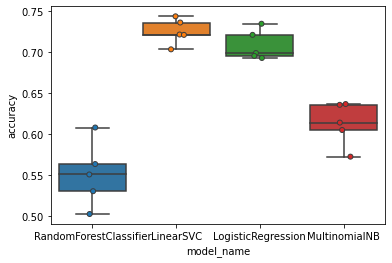

In [23]:
# Plotting
sns.boxplot(x = 'model_name', y = 'accuracy', data= Model_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = Model_df, linewidth = 1)
plt.show()

In [24]:
Model_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.724798
LogisticRegression        0.708291
MultinomialNB             0.612850
RandomForestClassifier    0.551323
Name: accuracy, dtype: float64

Let's try using F1 score

In [25]:
Model_df = pd.DataFrame(index = range(5* len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,feat, labels, scoring = 'f1_macro', cv = 5)
    
    for idx, accuracy in enumerate(accuracies):
        entries.append((model_name,idx, accuracy))
    
Model_df = pd.DataFrame(entries, columns = ['model_name','idx','accuracy'])

/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

In [26]:
Model_df

,model_name,idx,accuracy
0,RandomForestClassifier,0,0.381484
1,RandomForestClassifier,1,0.440005
2,RandomForestClassifier,2,0.450424
3,RandomForestClassifier,3,0.435525
4,RandomForestClassifier,4,0.394118
5,LinearSVC,0,0.548765
6,LinearSVC,1,0.627020
7,LinearSVC,2,0.593433
8,LinearSVC,3,0.627817
9,LinearSVC,4,0.666475


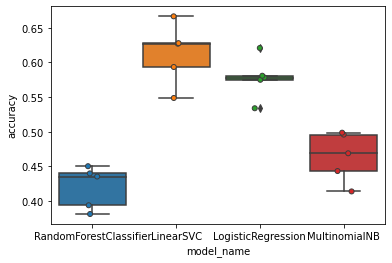

In [27]:
# Let's Plot now
sns.boxplot(x = 'model_name', y = 'accuracy', data= Model_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = Model_df, linewidth = 1)
plt.show()

In [28]:
Model_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.612702
LogisticRegression        0.577761
MultinomialNB             0.464235
RandomForestClassifier    0.420311
Name: accuracy, dtype: float64

The LinearSVC model worked best on our dataset. Let's interpret our predictions better 

Let's try out some advanced models on our dataset for more accurate predictions.

In [29]:
!pip install tqdm

In [31]:
data = pd.read_csv('New_combined_data')
data

,Unnamed: 0,Flair,URL,Title,Comments,Selftext,ID,Combined
0,0,News,https://www.cnbc.com/2021/09/08/job-openings-s...,"Job openings soar to record 10.9 million, outn...",['Rule-breaking comments have reached an exces...,NaN,0,"Job openings soar to record 10.9 million, outn..."
1,1,News,https://www.yahoo.com/finance/news/china-prope...,China’s property market runs out of steam as m...,"['[removed]', ""I'm not saying this is the same...",NaN,0,China’s property market runs out of steam as m...
2,2,News,https://www.cnbc.com/2021/08/31/millions-of-am...,Millions of Americans will lose unemployment b...,"['Please keep all comments substantive, on top...",NaN,0,Millions of Americans will lose unemployment b...
3,3,News,https://www.cbc.ca/news/business/lumber-prices...,Lumber crash leads to 'blowout' sales as price...,"[""I'm in a totally different field but you can...",NaN,0,Lumber crash leads to 'blowout' sales as price...
4,4,News,https://nyti.ms/3jYqJgO,"Skilled Workers Are Scarce, Posing a Challenge...",['It looks like this post may have political c...,NaN,0,"Skilled Workers Are Scarce, Posing a Challenge..."
...,...,...,...,...,...,...,...,...
3327,3327,Policy/Economy,https://www.livemint.com/news/india/mumbaiahme...,Mumbai-Ahmedabad bullet train: Railways launch...,[],NaN,17,Mumbai-Ahmedabad bullet train: Railways launch...
3328,3328,Policy/Economy,https://timesofindia.indiatimes.com/city/kolka...,Supercar owners in Kolkata frustrated with fue...,['Supercar owners fristated with fuel prices? ...,NaN,17,Supercar owners in Kolkata frustrated with fue...
3329,3329,Policy/Economy,https://www.deccanherald.com/national/dont-lec...,"Don't lecture India on freedom of speech, demo...","[""So they don't want to be answerable to anybo...",NaN,17,"Don't lecture India on freedom of speech, demo..."
3330,3330,Policy/Economy,https://www.reddit.com/r/india/comments/o2ikfk...,Revealed: RTI Request uncovers MeitY letters t...,"['Holy shit. Amazing work you guys', 'It would...",\n\n### tl;dr\n\nReports emerged last month t...,17,Revealed: RTI Request uncovers MeitY letters t...


In [32]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.head()

,Flair,URL,Title,Comments,Selftext,ID,Combined
0,News,https://www.cnbc.com/2021/09/08/job-openings-s...,"Job openings soar to record 10.9 million, outn...",['Rule-breaking comments have reached an exces...,NaN,0,"Job openings soar to record 10.9 million, outn..."
1,News,https://www.yahoo.com/finance/news/china-prope...,China’s property market runs out of steam as m...,"['[removed]', ""I'm not saying this is the same...",NaN,0,China’s property market runs out of steam as m...
2,News,https://www.cnbc.com/2021/08/31/millions-of-am...,Millions of Americans will lose unemployment b...,"['Please keep all comments substantive, on top...",NaN,0,Millions of Americans will lose unemployment b...
3,News,https://www.cbc.ca/news/business/lumber-prices...,Lumber crash leads to 'blowout' sales as price...,"[""I'm in a totally different field but you can...",NaN,0,Lumber crash leads to 'blowout' sales as price...
4,News,https://nyti.ms/3jYqJgO,"Skilled Workers Are Scarce, Posing a Challenge...",['It looks like this post may have political c...,NaN,0,"Skilled Workers Are Scarce, Posing a Challenge..."


In [33]:
data = data.sample(frac = 1).reset_index(drop = True)

In [35]:
# conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='2.7.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
cha

In [36]:
conda create -n tensorflow --y

Solving environment: done

## Package Plan ##

  environment location: /Users/jn/opt/anaconda3/envs/tensorflow



Preparing transaction: done
Verifying transaction: done
Executing transaction: done
#
# To activate this environment, use
#
#     $ conda activate tensorflow
#
# To deactivate an active environment, use
#
#     $ conda deactivate


Note: you may need to restart the kernel to use updated packages.


In [37]:
conda update -n base -c defaults conda

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [41]:
mkdir dl

mkdir: dl: File exists


In [42]:
SFOM00618927A:dl i854319$ source activate tensorflow
(tensorflow) SFOM00618927A:dl i854319$ conda list

SyntaxError: invalid syntax (<ipython-input-42-d991b5c042d9>, line 1)

In [38]:
# Now let's import some libraries for Tensorflow

import os
import re
import math
import operator
from collections import Counter

from tqdm import tqdm
tqdm.pandas()

import tensorflow as tf
# Other required libraries and models we will import at the time of implementation

ModuleNotFoundError: No module named 'tensorflow'

Let's do this work in a new python file